**ESCUELA POLITÉCNICA NACIONAL**

Nombre: Aarón Yumancela

Fecha: 17/12/2025



**Ejercicio 7: Álgebra de Embeddings**


Generar embeddings con sentence-transformers (SBERT, E5), e indexar documentos con FAISS

In [ ]:
!pip install -U gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 74.4 MB/s eta 0:00:00


In [ ]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gensim para cargar Word2Vec preentrenado
import gensim.downloader as api

In [ ]:


# Cargar modelo Word2Vec
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
model

In [ ]:

# Función para obtener el vector de una palabra
vec = lambda word: model[word]
vec("word")

array([ 3.59375000e-01,  4.15039062e-02,  9.03320312e-02,  5.46875000e-02,
       -1.47460938e-01,  4.76074219e-02, -8.49609375e-02, -2.04101562e-01,
        3.10546875e-01, -1.05590820e-02, -6.15234375e-02, -1.55273438e-01,
       -1.52343750e-01,  8.54492188e-02, -2.70996094e-02,  3.84765625e-01,
        4.78515625e-02,  2.58789062e-02,  4.49218750e-02, -2.79296875e-01,
        9.09423828e-03,  4.08203125e-01,  2.40234375e-01, -3.06640625e-01,
       -1.80664062e-01,  4.73632812e-02, -2.63671875e-01,  9.08203125e-02,
        1.37695312e-01, -7.20977783e-04,  2.67333984e-02,  1.92382812e-01,
       -2.29492188e-02,  9.70458984e-03, -7.37304688e-02,  4.29687500e-01,
       -7.93457031e-03,  1.06445312e-01,  2.80761719e-02, -2.29492188e-01,
       -1.91650391e-02, -2.36816406e-02,  3.51562500e-02,  1.71875000e-01,
       -1.12304688e-01,  6.25000000e-02, -1.69921875e-01,  1.29882812e-01,
       -1.54296875e-01,  1.58203125e-01, -7.76367188e-02,  1.78710938e-01,
       -1.72851562e-01,  

In [ ]:
# Vector base
x = "teacher"
V_x = vec(x)
print(V_x)

[ 2.63671875e-01 -1.61132812e-01  1.07910156e-01  1.44531250e-01
  3.46679688e-02  1.72851562e-01  2.63671875e-01 -1.60156250e-01
  2.58789062e-02 -8.34960938e-02  2.92968750e-01 -4.71191406e-02
 -1.57226562e-01 -2.65625000e-01  5.32226562e-02  3.26171875e-01
 -2.91748047e-02 -5.95703125e-02  8.64257812e-02 -3.22265625e-01
  1.75781250e-01  1.35742188e-01  2.73437500e-02  3.75976562e-02
  1.32812500e-01 -5.46875000e-01  2.80380249e-04 -6.98242188e-02
  3.27148438e-02 -1.42822266e-02  1.30859375e-01 -1.31835938e-01
 -1.76757812e-01  1.43554688e-01 -1.76757812e-01 -1.84570312e-01
  3.90625000e-01  3.14453125e-01  8.78906250e-02  2.96630859e-02
 -1.89453125e-01 -1.16699219e-01  1.42578125e-01 -1.07421875e-01
  5.61523438e-02 -1.87988281e-02  1.44531250e-01  6.64062500e-02
 -1.06445312e-01  1.01074219e-01 -3.84765625e-01 -1.72851562e-01
 -1.95312500e-02 -6.15234375e-02  2.39257812e-01 -2.04101562e-01
 -1.42578125e-01 -1.40991211e-02 -1.44653320e-02 -1.32812500e-01
  5.24902344e-02 -9.27734

In [ ]:
# Lista de palabras a comparar
y = [
    "coach",
    "tutor",
    "trainer",
    "education",
    "professor",
    "mentor",
    "dog",
    "tree",
    "cat",
    "horse"
]


# Obtener vectores de las palabras
vec_y = [vec(word) for word in y]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Calcular similitud entre teacher y cada palabra
sim = [cosine_similarity(X=vec_word.reshape(1,-1), Y=V_x.reshape(1, -1)) for vec_word in vec_y]

In [ ]:
# Ordenar por similitud
z = zip(y, sim)
print(sorted(z, key=lambda x: x[1], reverse=True))

[('tutor', array([[0.5925524]], dtype=float32)), ('education', array([[0.48910934]], dtype=float32)), ('professor', array([[0.39003688]], dtype=float32)), ('coach', array([[0.36374468]], dtype=float32)), ('mentor', array([[0.3161721]], dtype=float32)), ('trainer', array([[0.26810205]], dtype=float32)), ('horse', array([[0.13835363]], dtype=float32)), ('cat', array([[0.12398741]], dtype=float32)), ('dog', array([[0.12156066]], dtype=float32)), ('tree', array([[0.09888709]], dtype=float32))]


In [ ]:
model.most_similar("teacher",10)

[('teachers', 0.5095441937446594),
 ('Teacher', 0.5005102753639221),
 ('guidance_counselor', 0.47158560156822205),
 ('elementary', 0.44557690620422363),
 ('classroom', 0.4408673346042633),
 ('paraprofessional', 0.4373355805873871),
 ('educator', 0.42584002017974854),
 ('teaching', 0.4255771040916443),
 ('tutor', 0.4115149974822998),
 ('Teachers', 0.40963372588157654)]

In [ ]:
# Vector diferencia para definir eje 1
diff = vec_y[3] - V_x
e1 = diff / np.linalg.norm(diff)

In [ ]:
v_tmp = vec_y[7] - V_x
proj_on_e1 = np.dot(v_tmp, e1) * e1
e2 = v_tmp - proj_on_e1
e2 /= np.linalg.norm(e2)

In [ ]:
# Función de proyección al plano 2D
def project(v):
    return np.array([np.dot(v, e1), np.dot(v, e2)])

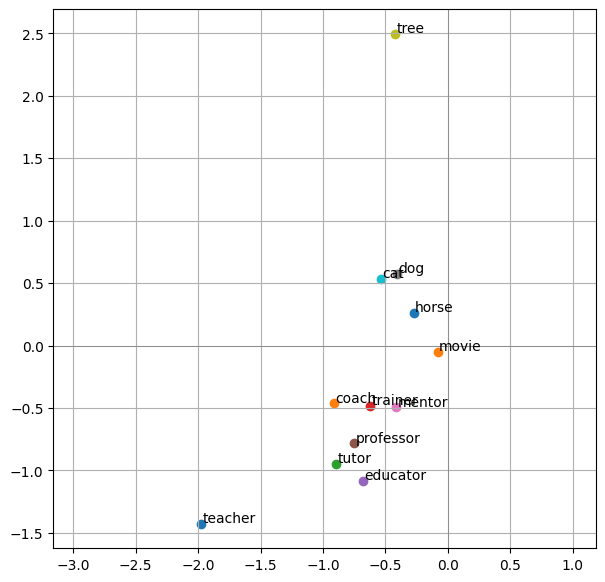

In [ ]:
# Proyección de los vectores al plano
# y = ["coach", "tutor", "trainer", "educator", "professor", "mentor", "dog", "tree", "cat", "horse"]

points = {
    'teacher': vec("teacher"),
    'coach': vec('coach'),
    'tutor': vec("tutor"),
    'trainer': vec("trainer"),
    'educator': vec("educator"),
    'professor': vec("professor"),
    'mentor': vec("mentor"),
    'dog': vec("dog"),
    'tree': vec("tree"),
    'cat': vec("cat"),
    'horse': vec("horse"),
    'movie': vec("movie")
}
plt.figure(figsize=(7, 7))
for word, vector in points.items():
    x, y = project(vector)
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word)

plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid()
plt.axis('equal')
plt.show()

In [ ]:
a, va = 'king', vec('king')
b, vb = 'man' , vec('man')
c, vc = 'woman' , vec('woman')

In [ ]:
q, vq = 'q', (va - vb + vc)

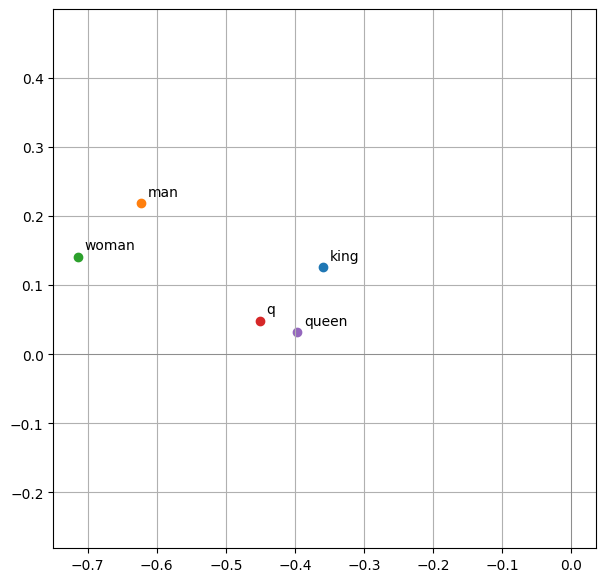

In [ ]:
# Proyección de los vectores al plano

points = {
    'king': vec("king"),
    'man': vec('man'),
    'woman': vec("woman"),
    'q': (va - vb + vc),
    'queen': vec("queen")

}
plt.figure(figsize=(7, 7))
for word, vector in points.items():
    x, y = project(vector)
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word)

plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid()
plt.axis('equal')
plt.show()

In [ ]:
sim = [cosine_similarity(X=vq.reshape(1,-1), Y=(vec('queen')).reshape(1, -1))]
sim

[array([[0.7300518]], dtype=float32)]